# Classification Models

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [3]:
df.columns.values

array(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday',
       ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend',
       ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity',

Looking at the columns above, it is noticed that most of the features' names begin with a space. Due to the inconvenince, we will fix the features' names by removing these spaces.

In [4]:
df.columns = df.columns.str.lstrip()
df.columns.values

array(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive

Looking at the attributes, we can deduce that the attributes url and timedelta are irrelevant features for our scope so they will be dropped. And it was approved by the domain experts who developed the dataset that these attributes are irrelevant.

In [5]:
df.isnull().sum()

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 61, dtype: int64

In [6]:
df.dtypes

url                              object
timedelta                       float64
n_tokens_title                  float64
n_tokens_content                float64
n_unique_tokens                 float64
                                 ...   
title_subjectivity              float64
title_sentiment_polarity        float64
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
shares                            int64
Length: 61, dtype: object

In [7]:
df.drop(columns=['url', 'timedelta'], inplace = True)

In [8]:
df.isnull().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_s

The rest of the data seem to be relevant so nothing needs to be dropped for now. With feature selection, the important features will be highlighted, and it will be applied later after the data cleaning. 

## Checking Datatypes of the columns

In [9]:
df.dtypes

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

The datatypes of the columns are all adjusted to the appropriate datatypes so there is no cleaning needed in this part. 

## Checking for Duplicate Values

In [10]:
df.duplicated().sum()

0

The dataset has no duplicates to be dropped.

## Checking for Outliers

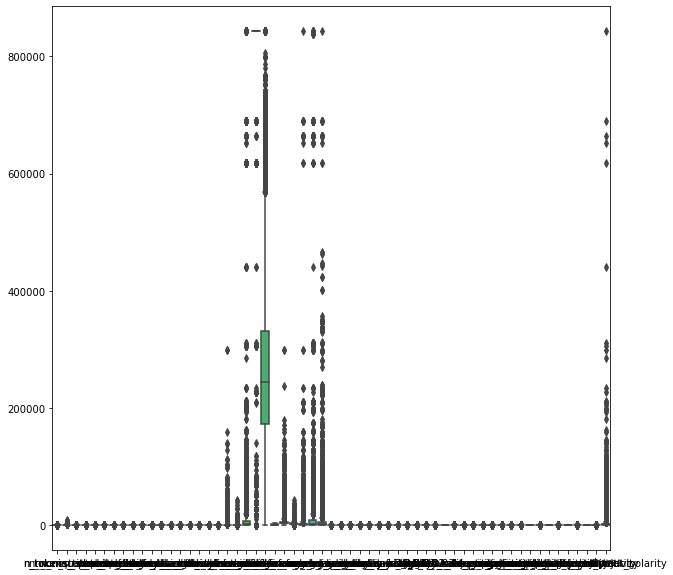

In [11]:
fig = plt.figure(figsize =(10, 10))
sns.boxplot(data = df)
plt.show()

In [12]:
for col in df:
    series = df[col]
    print(col, ': ','max: ', series.max(),", min: ", series.min())
    

n_tokens_title :  max:  23.0 , min:  2.0
n_tokens_content :  max:  8474.0 , min:  0.0
n_unique_tokens :  max:  701.0 , min:  0.0
n_non_stop_words :  max:  1042.0 , min:  0.0
n_non_stop_unique_tokens :  max:  650.0 , min:  0.0
num_hrefs :  max:  304.0 , min:  0.0
num_self_hrefs :  max:  116.0 , min:  0.0
num_imgs :  max:  128.0 , min:  0.0
num_videos :  max:  91.0 , min:  0.0
average_token_length :  max:  8.04153354633 , min:  0.0
num_keywords :  max:  10.0 , min:  1.0
data_channel_is_lifestyle :  max:  1.0 , min:  0.0
data_channel_is_entertainment :  max:  1.0 , min:  0.0
data_channel_is_bus :  max:  1.0 , min:  0.0
data_channel_is_socmed :  max:  1.0 , min:  0.0
data_channel_is_tech :  max:  1.0 , min:  0.0
data_channel_is_world :  max:  1.0 , min:  0.0
kw_min_min :  max:  377.0 , min:  -1.0
kw_max_min :  max:  298400.0 , min:  0.0
kw_avg_min :  max:  42827.8571429 , min:  -1.0
kw_min_max :  max:  843300.0 , min:  0.0
kw_max_max :  max:  843300.0 , min:  0.0
kw_avg_max :  max:  843300

## Using Quantile Method to Trim outliers

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

n_tokens_title                   3.000000e+00
n_tokens_content                 4.700000e+02
n_unique_tokens                  1.378252e-01
n_non_stop_words                 4.314000e-09
n_non_stop_unique_tokens         1.288902e-01
num_hrefs                        1.000000e+01
num_self_hrefs                   3.000000e+00
num_imgs                         3.000000e+00
num_videos                       1.000000e+00
average_token_length             3.764347e-01
num_keywords                     3.000000e+00
data_channel_is_lifestyle        0.000000e+00
data_channel_is_entertainment    0.000000e+00
data_channel_is_bus              0.000000e+00
data_channel_is_socmed           0.000000e+00
data_channel_is_tech             0.000000e+00
data_channel_is_world            0.000000e+00
kw_min_min                       5.000000e+00
kw_max_min                       5.550000e+02
kw_avg_min                       2.152500e+02
kw_min_max                       7.900000e+03
kw_max_max                       0

Calculating upper fence and lower fence

In [14]:
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print(upper_fence, lower_fence)

n_tokens_title                       16.500000
n_tokens_content                   1421.000000
n_unique_tokens                       0.815433
n_non_stop_words                      1.000000
n_non_stop_unique_tokens              0.947965
num_hrefs                            29.000000
num_self_hrefs                        8.500000
num_imgs                              8.500000
num_videos                            2.500000
average_token_length                  5.419491
num_keywords                         13.500000
data_channel_is_lifestyle             0.000000
data_channel_is_entertainment         0.000000
data_channel_is_bus                   0.000000
data_channel_is_socmed                0.000000
data_channel_is_tech                  0.000000
data_channel_is_world                 0.000000
kw_min_min                           11.500000
kw_max_min                         1832.500000
kw_avg_min                          679.875000
kw_min_max                        19750.000000
kw_max_max   

In [15]:
for col in df:
    new_df = df[~((df[col] > upper_fence[col]) | (df[col] < lower_fence[col]))]
print(df.shape, new_df.shape)

(39644, 59) (35103, 59)


Lost only 4,541 rows which relatively not big since we still have more than 35,000 rows to train on

## Discretizing the Target

It is noticed that the target we want to reach which is predicting the number of shares needs to be converted into a a multi class classification problem. This can be atchieved by taking the y_train data and distribute them into bins which will act the classes that will be classified to.

In [16]:
X = new_df.iloc[:,0:-1]
y = pd.DataFrame(data=new_df['shares'])
y


,shares
0,593
1,711
2,1500
3,1200
4,505
...,...
39639,1800
39640,1900
39641,1900
39642,1100


In [34]:
X

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


In [72]:
normalized_X=(X-X.min())/(X.max()-X.min())

normalized_X

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.555556,0.028207,0.663594,1.0,0.815385,0.021390,0.017241,0.007812,0.000000,0.582024,...,0.378636,0.100000,0.70,0.650000,0.400,0.800000,0.500000,0.406250,0.000000,0.187500
1,0.388889,0.032844,0.604743,1.0,0.791946,0.016043,0.008621,0.007812,0.000000,0.611043,...,0.286915,0.033333,0.70,0.881250,0.875,0.900000,0.000000,0.500000,1.000000,0.000000
2,0.388889,0.027177,0.575130,1.0,0.663866,0.016043,0.008621,0.007812,0.000000,0.546334,...,0.495833,0.100000,1.00,0.533333,0.200,0.866667,0.000000,0.500000,1.000000,0.000000
3,0.388889,0.068393,0.503788,1.0,0.665635,0.048128,0.000000,0.007812,0.000000,0.547768,...,0.385965,0.136364,0.80,0.630303,0.400,0.833333,0.000000,0.500000,1.000000,0.000000
4,0.611111,0.138073,0.415646,1.0,0.540890,0.101604,0.163793,0.156250,0.000000,0.582331,...,0.411127,0.033333,1.00,0.779808,0.500,0.950000,0.454545,0.568182,0.090909,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.500000,0.044565,0.529052,1.0,0.684783,0.048128,0.060345,0.007812,0.013333,0.562470,...,0.333791,0.100000,0.75,0.740000,0.500,0.875000,0.100000,0.500000,0.800000,0.000000
39640,0.555556,0.042246,0.696296,1.0,0.885057,0.048128,0.060345,0.023438,0.640000,0.547842,...,0.374825,0.136364,0.70,0.788889,0.600,0.900000,0.300000,1.000000,0.400000,1.000000
39641,0.444444,0.056929,0.516355,1.0,0.644128,0.128342,0.008621,0.093750,0.013333,0.631338,...,0.307273,0.136364,0.50,0.643561,0.200,0.833333,0.454545,0.568182,0.090909,0.136364
39642,0.222222,0.087841,0.539493,1.0,0.692661,0.053476,0.008621,0.007812,0.000000,0.618672,...,0.236851,0.062500,0.50,0.794754,0.500,0.987500,0.000000,0.500000,1.000000,0.000000


In [18]:
cut = pd.DataFrame(pd.cut(y['shares'], 10)).value_counts().rename_axis('bins').reset_index(name = 'counts')
cut

,bins,counts
0,"(550.9, 1100.8]",13148
1,"(1100.8, 1650.7]",7810
2,"(1650.7, 2200.6]",4778
3,"(2200.6, 2750.5]",2335
4,"(2750.5, 3300.4]",1910
5,"(-4.499, 550.9]",1584
6,"(3300.4, 3850.3]",1219
7,"(3850.3, 4400.2]",1001
8,"(4400.2, 4950.1]",679
9,"(4950.1, 5500.0]",639


In [19]:
temp = cut.loc[0]
temp

bins      (550.9, 1100.8]
counts              13148
Name: 0, dtype: object

<AxesSubplot:xlabel='bins'>

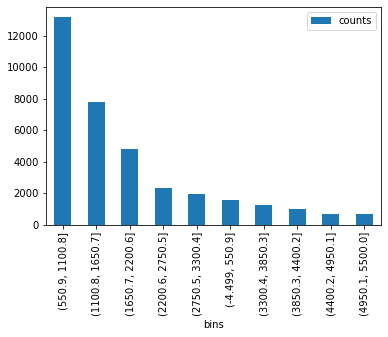

In [24]:
cut.plot.bar(x = 'bins', y = 'counts')

array([[0.],
       [1.],
       [6.],
       ...,
       [7.],
       [4.],
       [5.]])

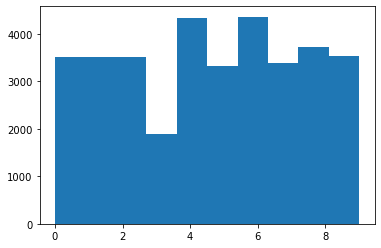

In [107]:
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_trans = kbins.fit_transform(y)
plt.hist(data_trans, bins=10)
data_trans

array([[0.],
       [0.],
       [2.],
       ...,
       [3.],
       [1.],
       [2.]])

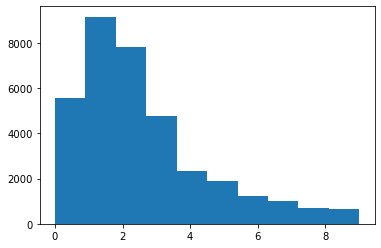

In [27]:
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
data_trans = kbins.fit_transform(y)
plt.hist(data_trans, bins=10)
data_trans

c:\Users\Farah\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


array([array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])], dtype=object)

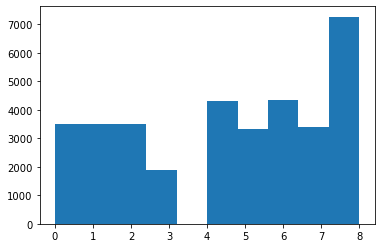

In [113]:
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
data_trans = kbins.fit_transform(y)
plt.hist(data_trans, bins=10)
kbins.bin_edges_

In [29]:
edges = np.int64(kbins.bin_edges_[0])
edges

array([   1,  686,  835,  971, 1100, 1300, 1500, 1900, 2400, 3400, 5500],
      dtype=int64)

In [108]:
y = pd.DataFrame(data_trans, columns=['Class'])
y

,Class
0,0.0
1,1.0
2,6.0
3,4.0
4,0.0
...,...
35098,6.0
35099,7.0
35100,7.0
35101,4.0


## Splitting the Data

In [109]:
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y,test_size=0.3, stratify = y, random_state=42)


<AxesSubplot:>

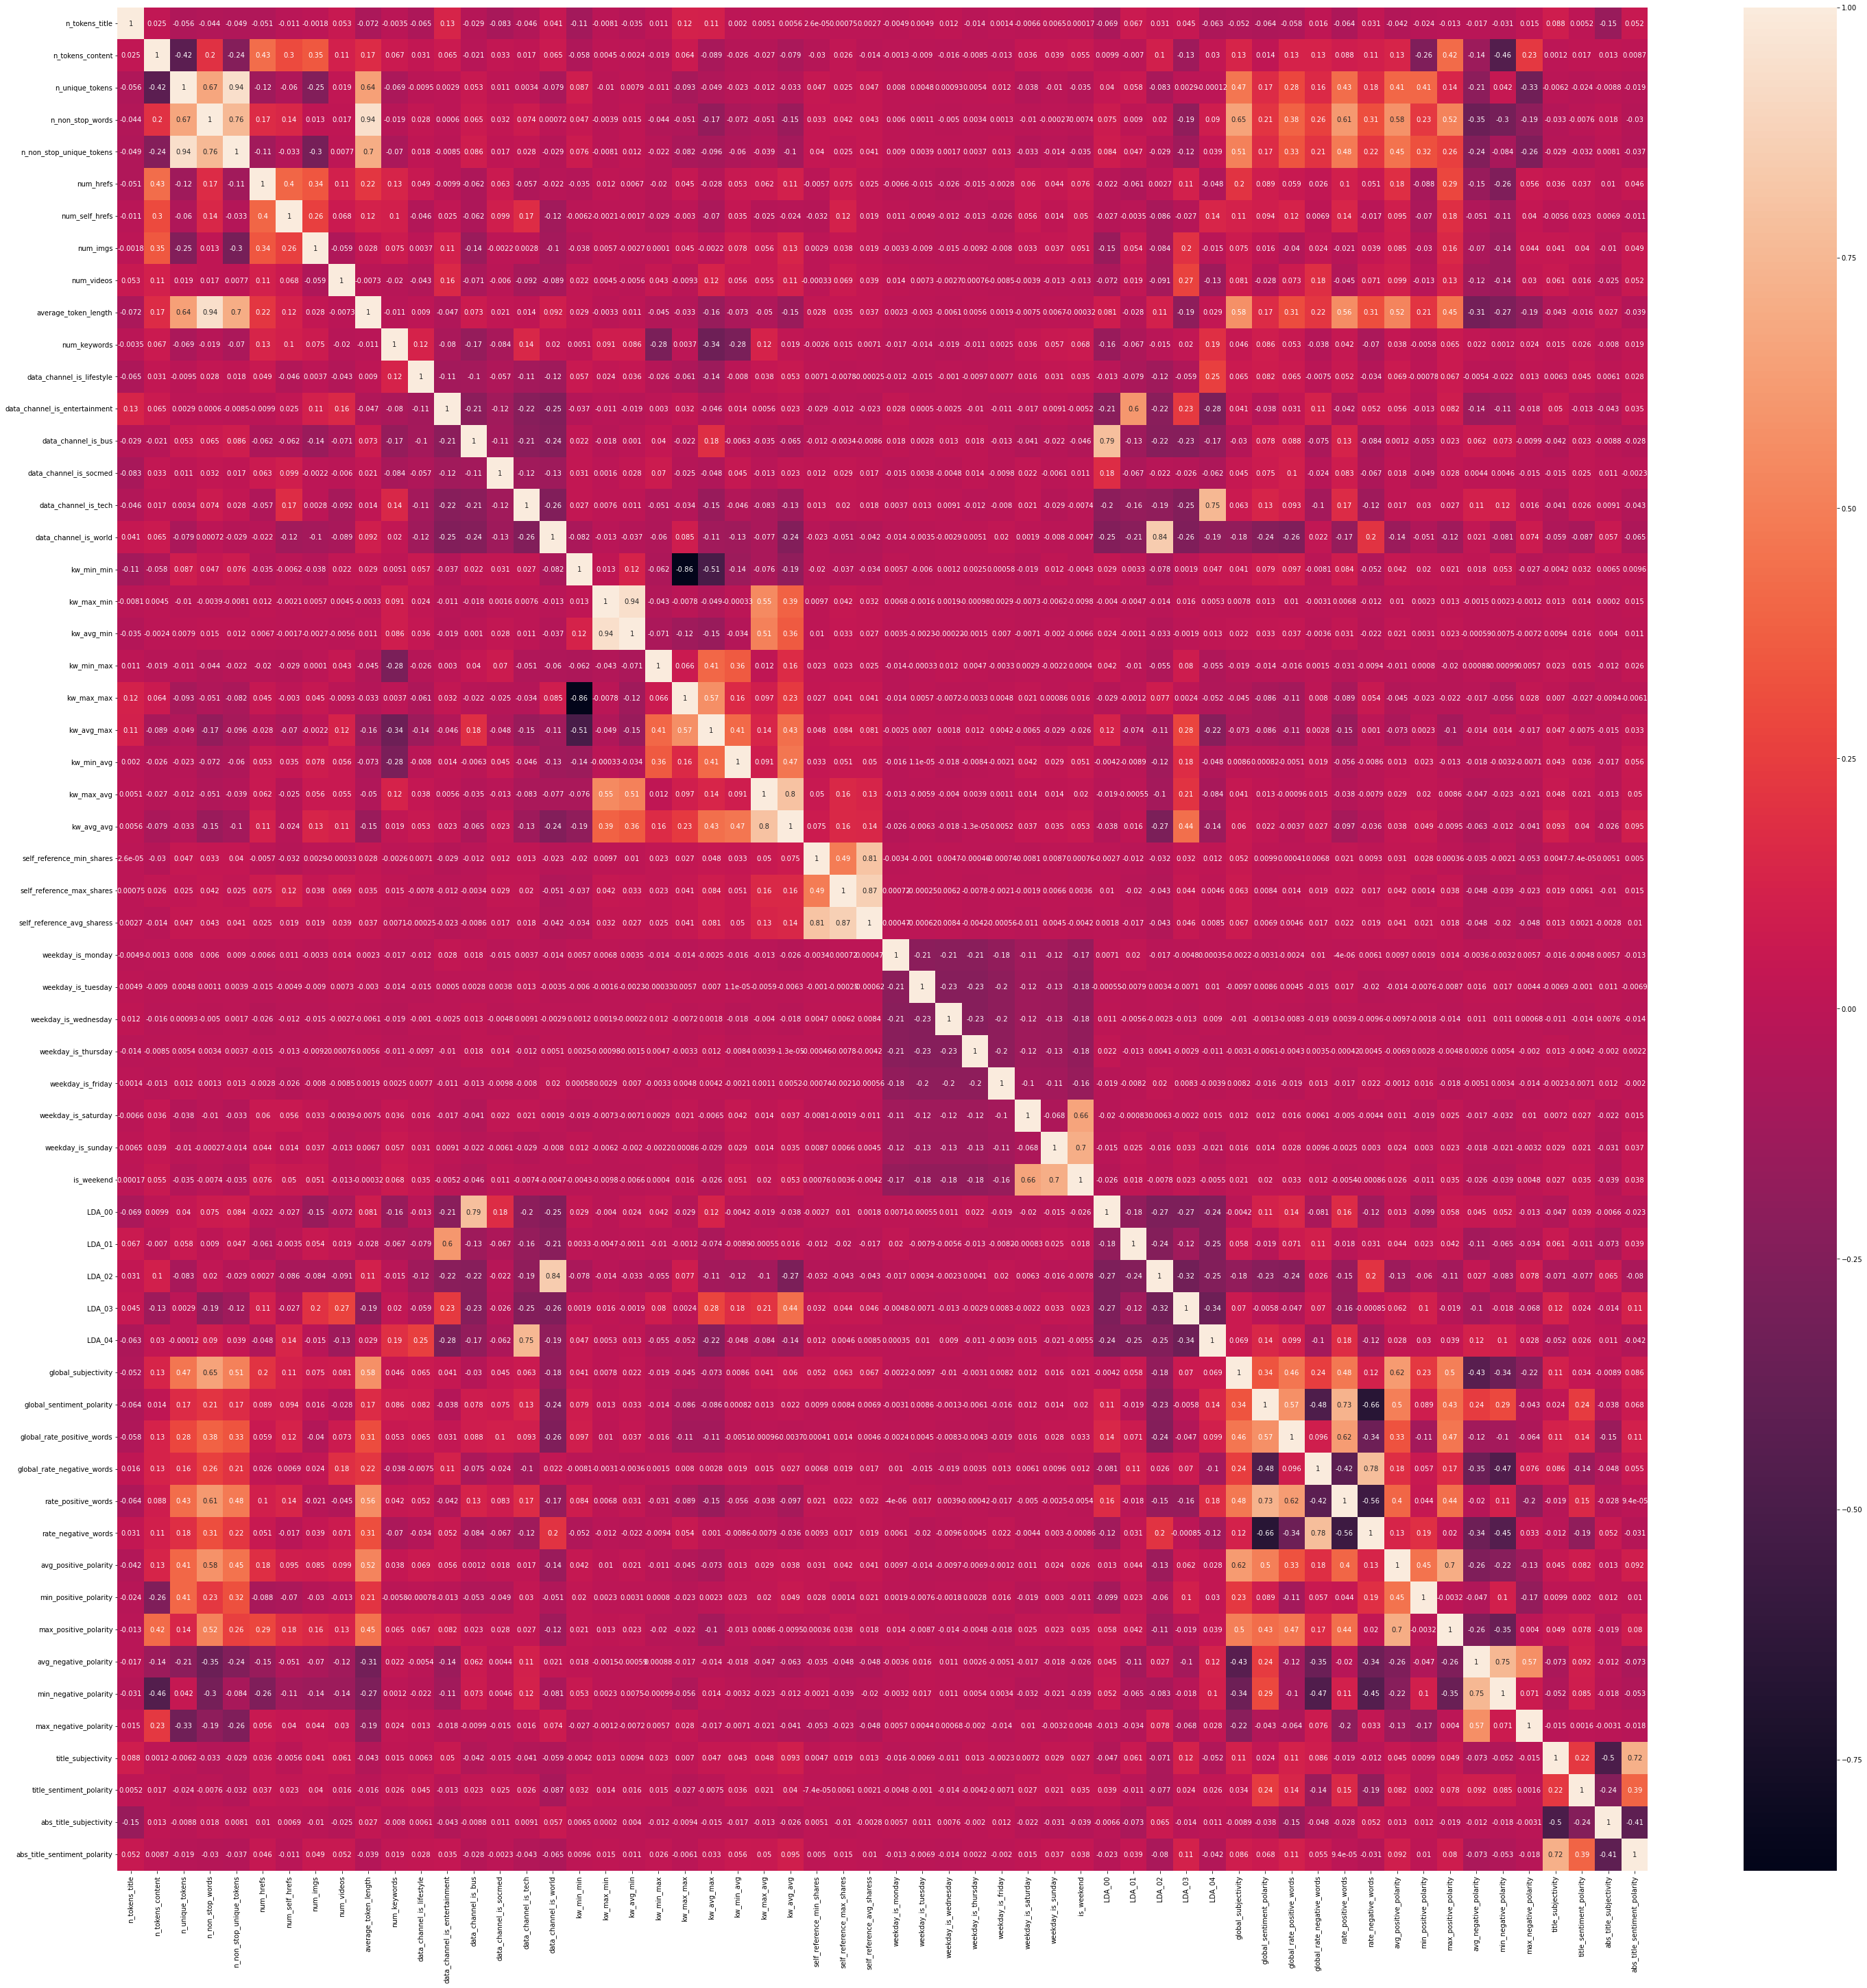

In [32]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(50,50)
sns.heatmap(corrmat,annot=True)

## Training The Classification Models

### Model (1): Decision Trees

#### Training without Feature selection

In [110]:
tree = DecisionTreeClassifier(max_depth=30, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.989
Accuracy on test set: 0.125


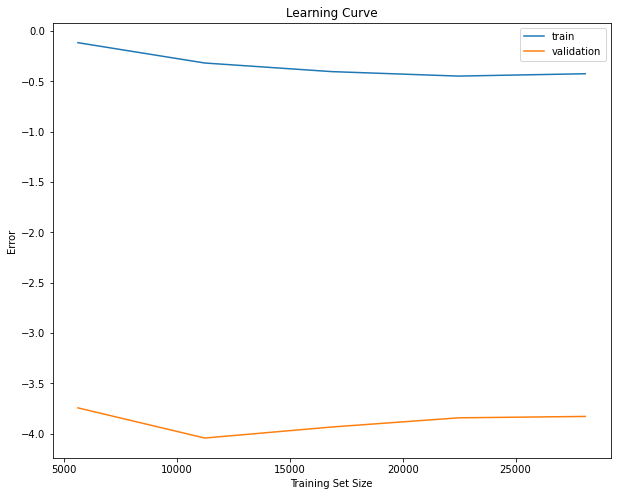

In [98]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=tree,
    X=X,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)

test_mean = test_scores.mean(axis=1)
test_std = test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")


plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


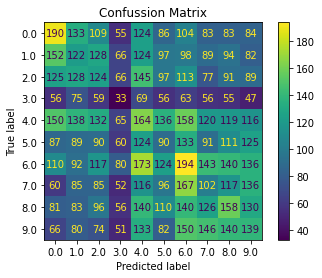

In [82]:
plot_confusion_matrix(tree, X_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

In [84]:
y_pred = tree.predict(X_test)
y_pred

array([9., 0., 0., ..., 9., 8., 2.])

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.17      0.30      0.21      1051
         1.0       0.13      0.17      0.15      1052
         2.0       0.13      0.15      0.14      1055
         3.0       0.09      0.04      0.05       569
         4.0       0.13      0.16      0.14      1298
         5.0       0.12      0.08      0.10      1000
         6.0       0.15      0.15      0.15      1309
         7.0       0.11      0.08      0.09      1016
         8.0       0.17      0.12      0.14      1120
         9.0       0.19      0.12      0.15      1061

    accuracy                           0.14     10531
   macro avg       0.14      0.14      0.13     10531
weighted avg       0.14      0.14      0.14     10531



#### Training with Feature selection

In [79]:
sfs = SFS(DecisionTreeClassifier(max_depth=30, random_state=0),
         k_features = (1, 7),
          forward= True,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

avg = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
avg = avg[["feature_idx","avg_score"]]
avg

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    7.8s finished

[2022-11-11 07:43:02] Features: 1/7 -- score: 0.13244926683452096[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    4.0s finished

[2022-11-11 07:43:07] Features: 2/7 -- score: 0.134386541165185[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    4.0s finished

[2022-11-11 07:43:11] Features: 3/7 -- score: 0.13715940468567123[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  55 out of 

,feature_idx,avg_score
1,"(26,)",0.132449
2,"(26, 36)",0.134387
3,"(15, 26, 36)",0.137159
4,"(3, 15, 26, 36)",0.138147
5,"(3, 14, 15, 26, 36)",0.138071
6,"(3, 14, 15, 26, 32, 36)",0.139173
7,"(3, 14, 15, 26, 29, 32, 36)",0.140502


In [53]:
sfs = SFS(DecisionTreeClassifier(max_depth=30, random_state=0),
         k_features = (1, 7),
          forward= False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

avg = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
avg = avg[["feature_idx","avg_score"]]
avg

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:  1.2min finished

[2022-11-11 02:00:04] Features: 57/1 -- score: 0.13427287684115544[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:  1.2min finished

[2022-11-11 02:01:18] Features: 56/1 -- score: 0.13408277450009282[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:  1.2min finished

[2022-11-11 02:02:33] Features: 55/1 -- score: 0.13453868421615203[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done  55 ou

,feature_idx,avg_score
58,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.128081
57,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.134273
56,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.134083
55,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.134539
54,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.13488
53,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.136324
52,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.133779
51,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...",0.133855
50,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...",0.135602
49,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15...",0.135185


### Model (2): KNN

#### Training without Feature selection

c:\Users\Farah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

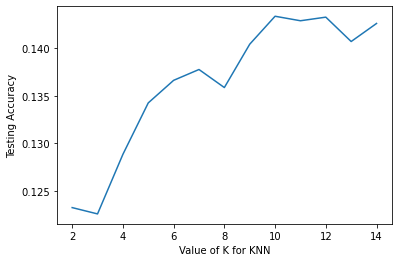

In [112]:
k_range = range(2, 15)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

#### Training with Feature selection

### Model (3): Logistic Regression

#### Training without Feature selection

#### Training with Feature selection